# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [2]:
import math as math
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(If)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+np.abs(toVisualizeFT(If)))



2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

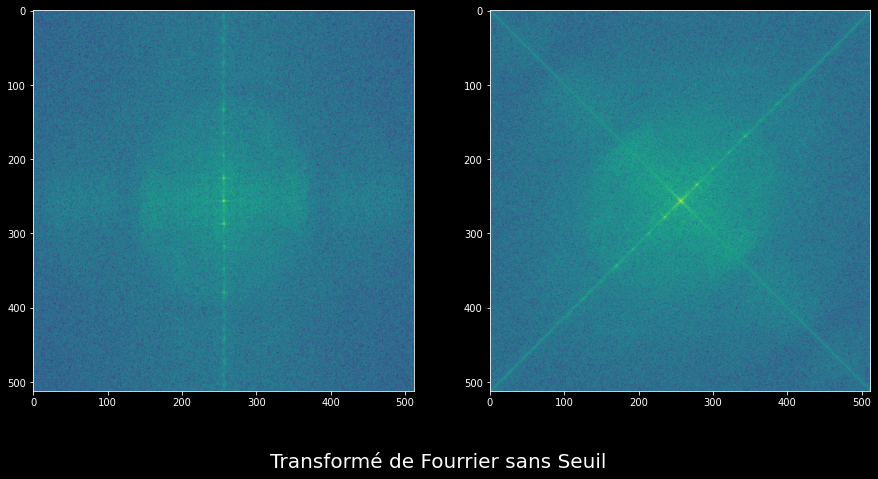

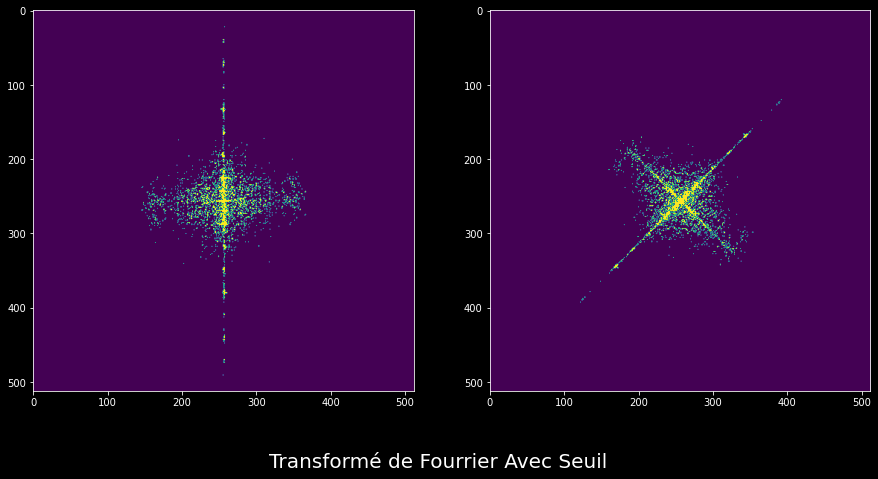

In [38]:
import matplotlib.pyplot as plt
import math 

def thresholdImage(I,s):
    """ Array*int -> Array """
    J = I.copy()
    n,m = I.shape
    for i in range(n):
        for j in range(m):
            if(J[i,j]<s):
                J[i,j]=0
            else:
                J[i,j]=255
    return J

compute_son = computeFT(son)
compute_sonrot = computeFT(sonrot)
FTlog_son = toVisualizeLogFT(compute_son)
FTlog_sonrot = toVisualizeLogFT(compute_sonrot)

fig ,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(FTlog_son)
ax[1].imshow(FTlog_sonrot)
fig.text(0.5, 0.26, 'Transformé de Fourrier sans Seuil', ha='center', va='center',fontsize=20)
plt.show()

thresholdFTlog_son = thresholdImage(FTlog_son,math.log(100000))
thresholdFTlog_sonrot = thresholdImage(FTlog_sonrot,math.log(100000))

fig ,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(thresholdFTlog_son)
ax[1].imshow(thresholdFTlog_sonrot)
fig.text(0.5, 0.26,'Transformé de Fourrier Avec Seuil', ha='center', va = 'center',fontsize=20)
plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

On peux voir ici que les spectre filtrés du signal des deux images est similaire voir identique avec une rotation pour l'image `sonrot`. En effet, grâce a la Transformée de Fourier,on peux voir que le spectre a été conservé mais a subit la même rotation que l'image. On vois bien une ligne plus ou moins continue sur l'axe vertical témoignant d'une variation de la valeur des pixel sur l'axe horizontal.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [4]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    assert(alpha >=0 and alpha <= 1)
    return alpha*I1 + (1 - alpha) * I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

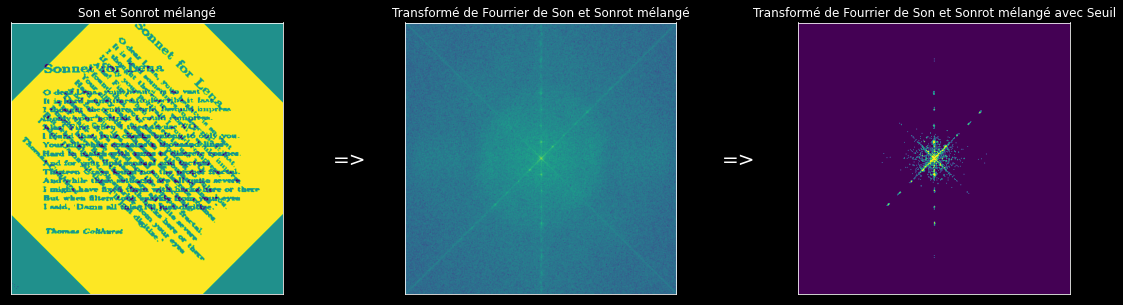

In [56]:
blend_son_sonrot = blend(son,sonrot,0.5)
FTBlend = toVisualizeLogFT(computeFT(blend_son_sonrot))
thresholdFTBlend = thresholdImage(FTBlend,math.log(100000))

fig, axes = plt.subplots(1,3,figsize=(20,5))

axes[0].imshow(blend_son_sonrot)
axes[0].set(title='Son et Sonrot mélangé')
axes[0].yaxis.set_visible(False)
axes[0].xaxis.set_visible(False)

axes[1].imshow(FTBlend)
axes[1].set(title='Transformé de Fourrier de Son et Sonrot mélangé')
axes[1].yaxis.set_visible(False)
axes[1].xaxis.set_visible(False)

axes[2].imshow(thresholdFTBlend)
axes[2].set(title='Transformé de Fourrier de Son et Sonrot mélangé avec Seuil')
axes[2].yaxis.set_visible(False)
axes[2].xaxis.set_visible(False)

fig.text(0.38, 0.5, '=>', ha='center', va='center',fontsize=20)
fig.text(0.65, 0.5, '=>', ha='center', va='center',fontsize=20)

plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

On observe sur le spectre filtré que la fusion des deux images conduit à la fusion des spectres. La TF conserve les mêmes valeurs que pour les spectres filtré individuellement mais avec une atténuation du fait de $\alpha$. En effet en variant $\alpha$ sur les valeur 0 ou 1, on retrouve respectivement l'image `sonrot` et `son`.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [65]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    #récupération de la taille de l'image
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    #nuancier
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T
    
    #matrice de zéro reprise sur la taille de l'image
    Iori = np.zeros((n, m))
    #matrice de zéros pour l'indication de l'orientation
    orients = np.zeros((size))

    #parcours de l'image 
    for i in range(1,n+1):
        for j in range(1,m+1):
            #si l'image est correctement filtré seul les pixels avec une valeur supérieur à zéros nous importent
            if I[i-1, j-1] > 0:
                #on construit une autre matrice réduite de l'image (l'environement proche/voisinage du pixel d'étude)
                v = np.array([j-m/2, -i + n/2])
                #on ne travail que sur la moitiée supérieur de l'image
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    #on ne s'interresse qu'au endroit ou les nuances de gris sont marqué sur le spectre
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

def rectifyOrientation(I):
    """ Array -> void """
    thresholdI = thresholdImage(toVisualizeLogFT(computeFT(I)),math.log(3*10e4))
    orien = mainOrientation(thresholdI)
    rotateI = rotateImage(I,-orien[1])
    plt.figure(figsize=(10,10))
    plt.imshow(rotateI,cmap='gray')
    plt.show()

    
# Explications de mainOrientation:

# mainOrientation cherche à récuperer la rotation de d'une image. Pour cela on lui fourni le spectre filtré de ce
# dernier. Comme décris précedement, après avoir éffectuer la transformer de fourier puis centré/shift le résultat ,
# on peux observer le spectre du signal de l'image. les variations importante de nuance de gris sont décritent 
# sur le spectre et indique l'orientation de ce dernier. MainOrientation vas parcourir ce spectre et établir l'angle 
# que décrivent les trais carractéristique du spectre en observant les pixels et leur voisinage.Après le traitement,
# on regarde le pixel donnant la plus grande orientation et on peux calculer l'angle par raport au centre.

8. Experiment `rectifyOrientation()` on `sonrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

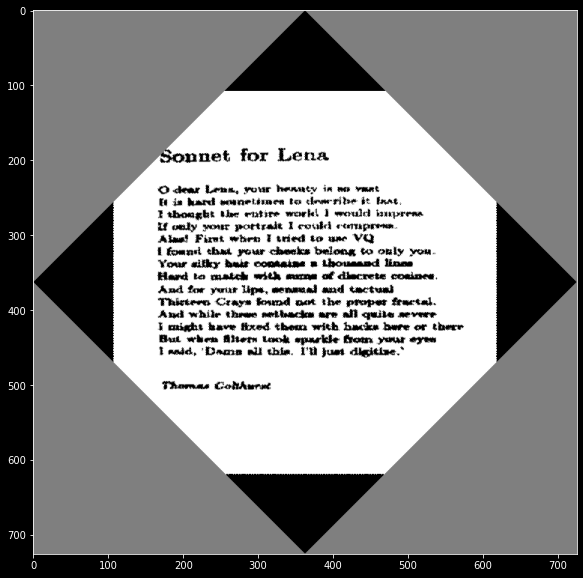

In [60]:
rectifyOrientation(sonrot)

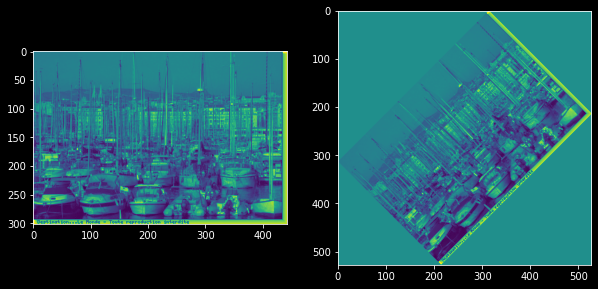

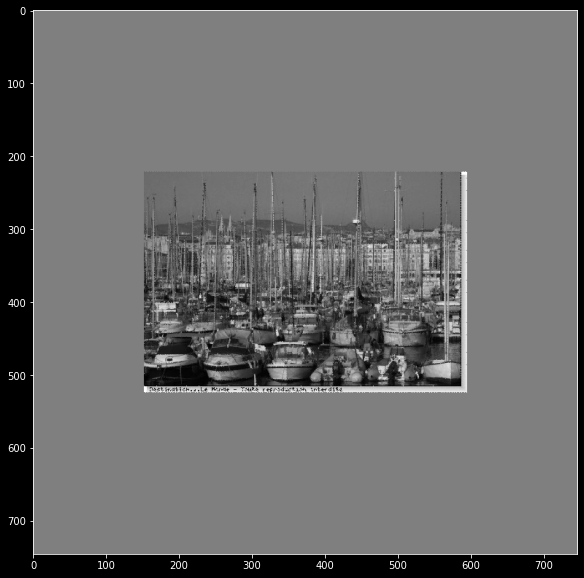

In [67]:
#  Experience avec la fonction rectifyOrientation:

port = np.array(Image.open('img/port.jpg'))

fig ,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(port)

rotaPort = rotateImage(port,45)
ax[1].imshow(rotaPort)
plt.show()

rectifyOrientation(rotaPort)


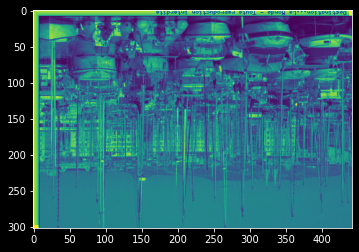

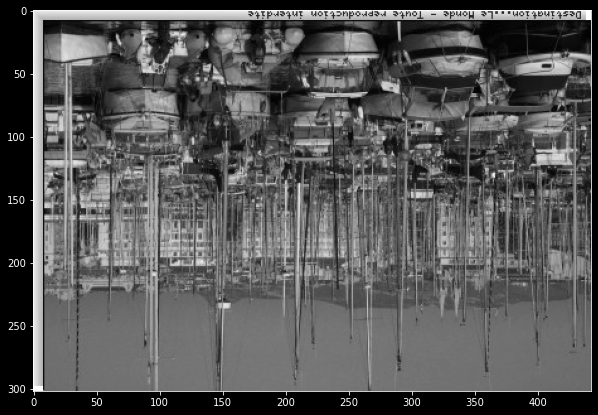

In [68]:

upSideDownPort = rotateImage(port,180)
plt.imshow(upSideDownPort)
plt.show()

rectifyOrientation(upSideDownPort)

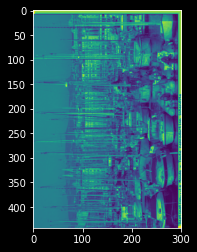

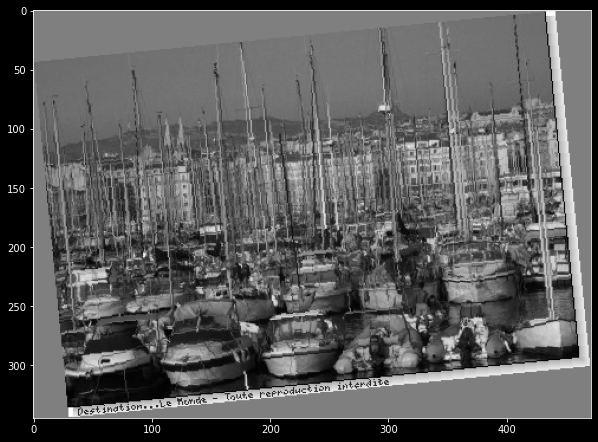

In [69]:
rota90Port = rotateImage(port,90)
plt.imshow(rota90Port)
plt.show()

rectifyOrientation(rota90Port)